In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [38]:
df = pd.read_csv("houses.csv")

In [39]:
df.head(3)

,ID,Size (sqft),Bedrooms,Bathrooms,Floors,Year Built,Price
0,1,2400,4,3.0,2,2001,500000
1,2,1600,3,2.0,1,1995,350000
2,3,1800,3,2.5,1,2010,420000


<Axes: >

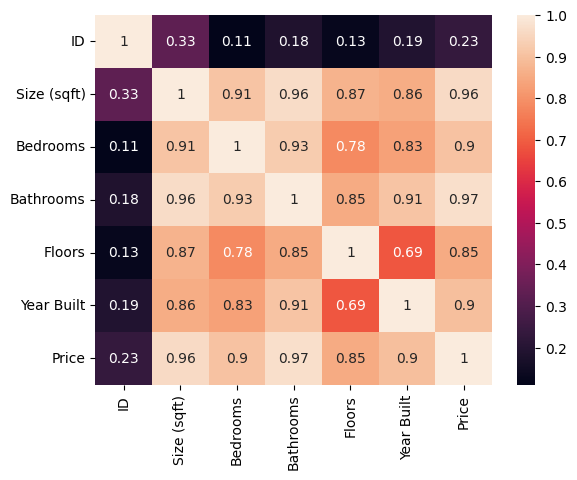

In [40]:
sns.heatmap(data=df.corr(),annot=True)

In [41]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [42]:
x = df.iloc[:,:-1]

In [43]:
y = df["Price"]

In [44]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [45]:
x

,ID,Size (sqft),Bedrooms,Bathrooms,Floors,Year Built
0,-1.647509,0.499610,0.697486,0.524382,0.535303,-0.022515
1,-1.474087,-1.131770,-0.464991,-0.709458,-0.994135,-0.562886
2,-1.300665,-0.723925,-0.464991,-0.092538,-0.994135,0.788040
3,-1.127243,-1.335692,-1.627467,-1.326377,-0.994135,-1.913813
4,-0.953821,0.091765,0.697486,0.524382,0.535303,0.337732
5,-0.780399,-0.316080,-0.464991,-0.709458,0.535303,-0.292701
6,-0.606977,1.723145,1.859962,1.758221,2.064742,1.238349
7,-0.433555,-0.927847,-0.464991,-0.709458,-0.994135,-0.833071
8,-0.260133,0.703532,0.697486,0.524382,0.535303,0.607917
9,-0.086711,-0.520002,-0.464991,-0.709458,-0.994135,-0.112577


In [47]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

LinearRegression 

In [49]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

85.40924833019389

In [50]:
lr.coef_

array([  2433.90740031,  32793.92951342, -14180.99399728,  61675.93839818,
        21076.47182203,  31750.21967642])

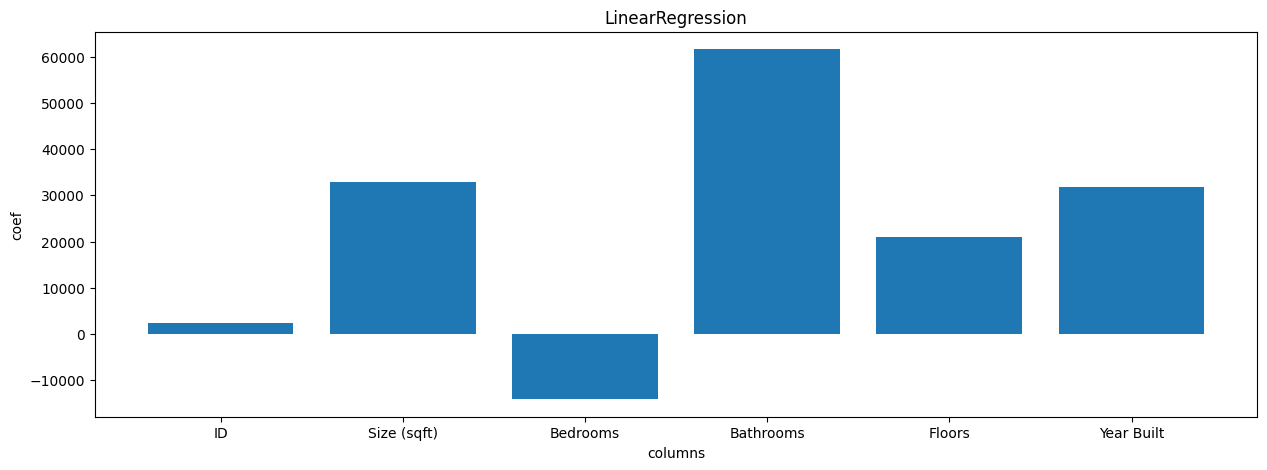

In [66]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

LASSO

In [67]:
la = Lasso(alpha=0.5)
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

85.41312482854768

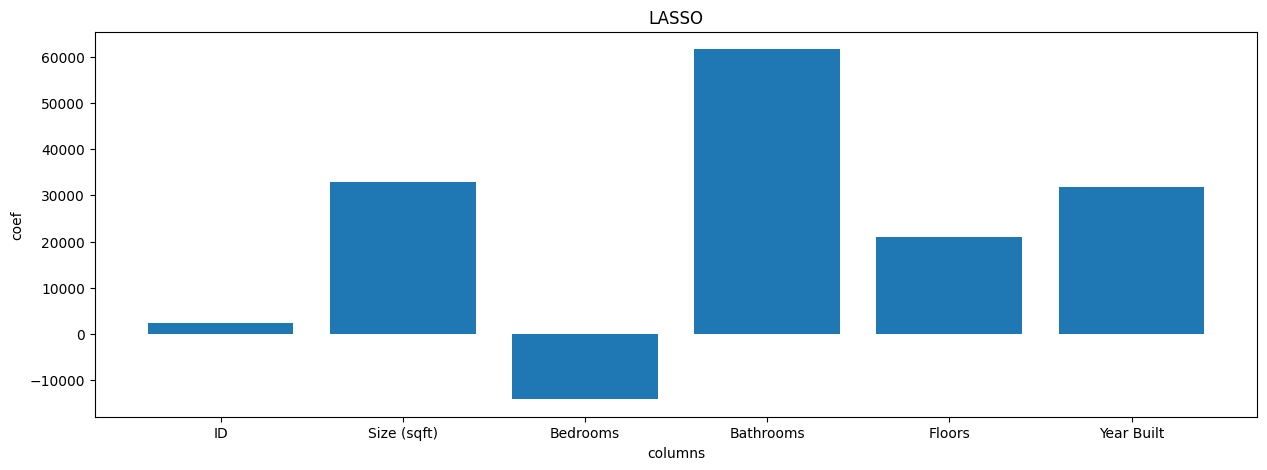

In [73]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , la.coef_)
plt.title("LASSO")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

**RIDGE**

In [72]:
ri = Ridge()
ri.fit(x_train, y_train)
ri.score(x_test,y_test)*100

89.86261373270443

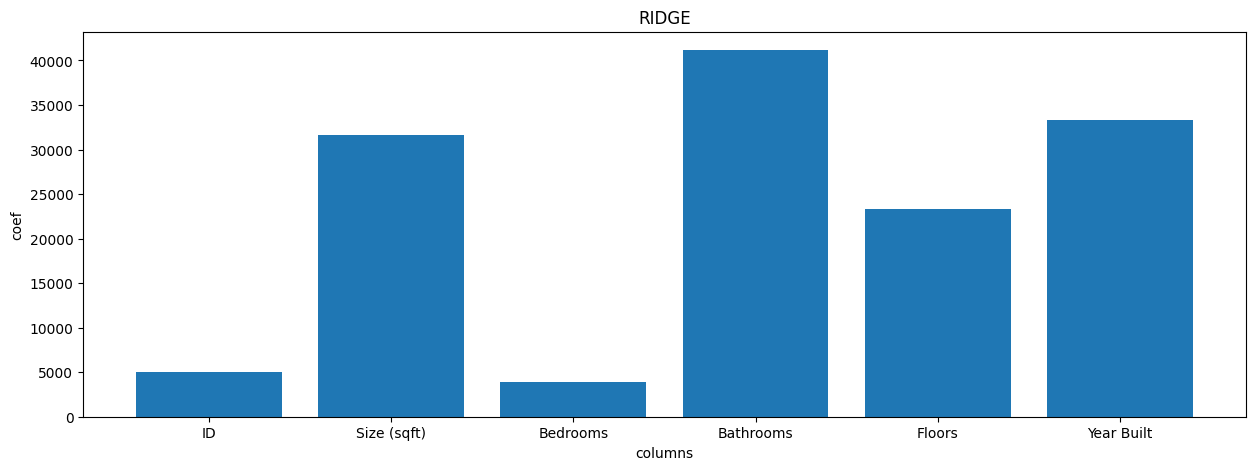

In [74]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , ri.coef_)
plt.title("RIDGE")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

1242949657.8716085
34688.58099682242
35255.491173313814


In [81]:
#  for lasso 

print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

1242619428.668094
34684.14577734207
35250.807489589424


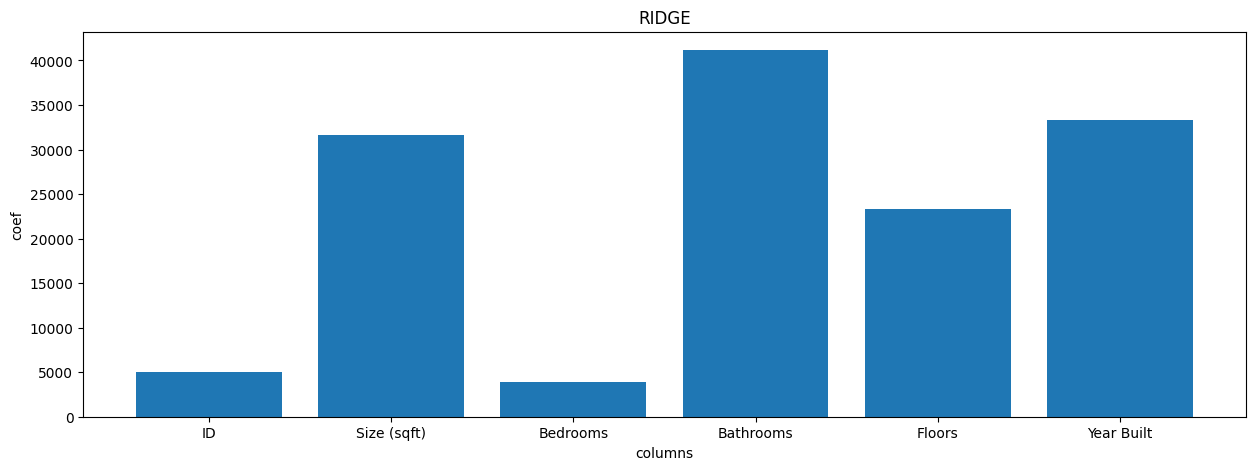

In [82]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , ri.coef_)
plt.title("RIDGE")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [83]:
df = pd.DataFrame({"col_name":x.columns , "LinearRegression": lr.coef_ , "Lasso":la.coef_ , "Ridge":ri.coef_})

In [84]:
df

,col_name,LinearRegression,Lasso,Ridge
0,ID,2433.907400,2434.811065,4996.649959
1,Size (sqft),32793.929513,32791.732404,31594.735875
2,Bedrooms,-14180.993997,-14171.763835,3936.596778
3,Bathrooms,61675.938398,61671.932069,41169.891692
4,Floors,21076.471822,21075.512319,23298.995434
5,Year Built,31750.219676,31748.527862,33347.385205
